In [2]:
import mysql.connector as connection
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
try:
    mydb = connection.connect(host="localhost", database = 'Muse_Job_details',user="root", passwd="admin")
    query = "Select * from Job_listings_DA;"
    df = pd.read_sql(query,mydb,parse_dates='publish date')
    mydb.close() #close the connection
except Exception as e:
    mydb.close()
    print(str(e))

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   id              7905 non-null   int64          
 1   position title  7905 non-null   object         
 2   description     7905 non-null   object         
 3   level           7905 non-null   object         
 4   company         7905 non-null   object         
 5   publish date    7905 non-null   datetime64[ns] 
 6   publish time    7905 non-null   timedelta64[ns]
dtypes: datetime64[ns](1), int64(1), object(4), timedelta64[ns](1)
memory usage: 432.4+ KB


In [4]:
df['publish time']=df['publish time'].astype('string')

In [5]:
df.head()

,id,position title,description,level,company,publish date,publish time
0,722961,Service Desk Level I Analyst (Contract),This is an open ended contract assignment wher...,mid,Taco Bell,2022-05-25,0 days 10:09:11
1,850825,Machine Learning Researcher,Please note that this role requires profession...,mid,Hudson River Trading,2023-01-12,0 days 23:03:05
2,894406,Global Process Owner,JOB DESCRIPTION Global Process OwnerWilmington...,senior,CSC,2023-04-28,0 days 10:19:21
3,1078178,Chief Information Officer - Bally Sports,The Chief Information Officer (CIO) is a hands...,senior,Sinclair Broadcast Group,2023-04-25,0 days 11:23:35
4,1083707,Strategic Sourcing Agent,The Procurement team is growing and searching ...,mid,Sinclair Broadcast Group,2023-04-22,0 days 11:17:14


In [6]:
df.isnull().sum()

id                0
position title    0
description       0
level             0
company           0
publish date      0
publish time      0
dtype: int64

### Exploratory Data Analysis

Job Title

In [7]:
pd.set_option('display.max_rows',None)

Short listing data related jobs

In [8]:
pattern='engineer|analyst|scientist|Machine Learning|Data|AWS'
mask=df['position title'].str.contains(pattern,case=False)
df=df[mask]

- 10 most data related jobs

In [26]:
pop_job_titles=df['position title'].value_counts()[:10]
pop_job_titles

Senior Data Engineer                          64
Data Engineer                                 42
Senior Data Scientist                         30
Data Scientist                                24
Data Engineer, Product Analytics              22
Software Engineer, Machine Learning           21
Data Analyst                                  19
Lead Data Engineer                            17
Software Engineer, Product - Generative AI    16
Data Engineer, Analytics                      15
Name: position title, dtype: int64

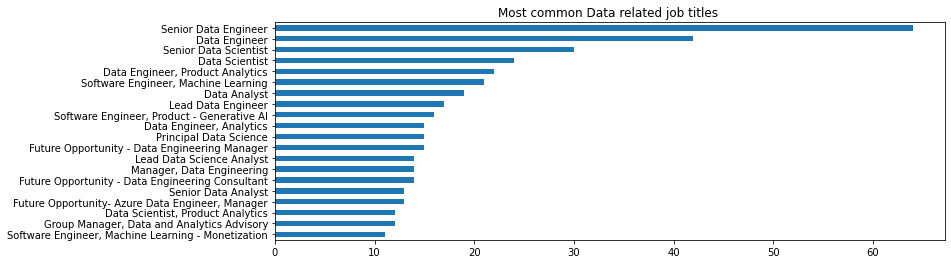

In [10]:
df['position title'].value_counts()[:20].plot(kind='barh',figsize=(12,4)).invert_yaxis()
plt.title('Most common Data related job titles ')
plt.show()

In [11]:
df.head()

,id,position title,description,level,company,publish date,publish time
0,722961,Service Desk Level I Analyst (Contract),This is an open ended contract assignment wher...,mid,Taco Bell,2022-05-25,0 days 10:09:11
1,850825,Machine Learning Researcher,Please note that this role requires profession...,mid,Hudson River Trading,2023-01-12,0 days 23:03:05
5,1088354,Data and Reporting Analyst,Sinclair Broadcast Group (SBG) is seeking a fu...,senior,Sinclair Broadcast Group,2023-04-25,0 days 11:23:35
26,4181663,Senior Data Insights Analyst,Bluecore is a marketing technology company tha...,senior,Bluecore,2021-07-15,0 days 21:27:56
27,4278353,Principal Data Scientist,Bluecore is a marketing technology company tha...,senior,Bluecore,2021-07-15,0 days 21:27:56


In [12]:
df.columns

Index(['id', 'position title', 'description', 'level', 'company',
       'publish date', 'publish time'],
      dtype='object')

In [13]:
df.groupby(['level'])['position title'].count()

level
entry           12
internship      46
mid           1096
senior        2350
Name: position title, dtype: int64

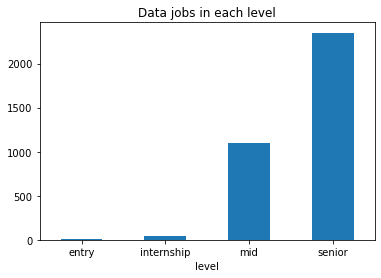

In [14]:
df.groupby(['level'])['position title'].count().plot(kind='bar')
plt.title('Data jobs in each level')
plt.xticks(rotation='horizontal')
plt.show()

In [29]:
pop_job_df=df[df['position title'].isin([job for job in pop_job_titles.index])]
pop_job_df.head()

,id,position title,description,level,company,publish date,publish time
28,4278354,Senior Data Scientist,Bluecore is a marketing technology company tha...,senior,Bluecore,2021-07-15,0 days 21:27:56
30,4722492,Senior Data Scientist,"Senior Data Scientist Mountain View, CA Groun...",senior,GroundTruth,2021-06-10,0 days 23:12:58
45,5571580,Senior Data Scientist,"Senior Data ScientistMountain View, CA | Data ...",senior,GroundTruth,2021-06-10,0 days 23:12:58
46,5625957,Data Engineer,The Data team leverages data from our autonomo...,mid,Zoox,2023-01-14,0 days 23:01:44
77,5769874,Senior Data Scientist,"Senior Data ScientistMountain View, CA | Data ...",senior,GroundTruth,2021-06-10,0 days 23:12:58


In [49]:
temp=pd.DataFrame(pop_job_df.groupby('level')['position title'].value_counts())
temp.columns=['count']
temp=temp.reset_index()
temp.head()

,level,position title,count
0,mid,Data Engineer,25
1,mid,Data Analyst,17
2,mid,"Data Engineer, Analytics",15
3,mid,"Data Engineer, Product Analytics",15
4,mid,Data Scientist,15


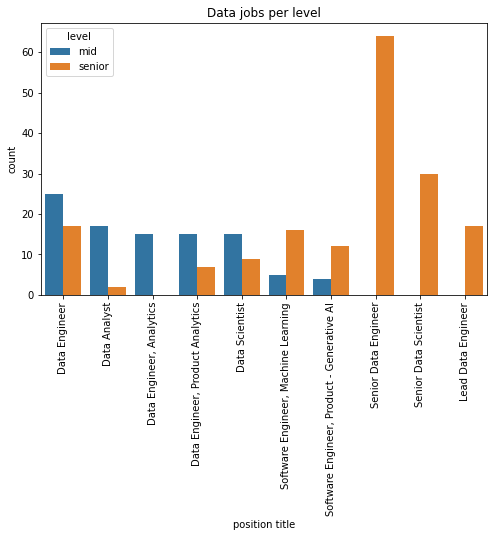

In [57]:
plt.figure(figsize=(8,5))
sns.barplot(x='position title',y='count',hue='level',data=temp)
plt.title('Data jobs per level')
plt.xticks(rotation=90)
plt.show()

From the plot we can see that most of the jobs are in mid and senior level. lets see what jobs are in entry level.

Analysing Entry level jobs

In [61]:
entry_df=df[df['level']=='entry']
entry_df

,id,position title,description,level,company,publish date,publish time
102,6696435,Online Data Analyst - Remote,We are hiring freelance English speaking Onlin...,entry,TELUS International AI Inc.,2022-10-06,0 days 15:07:17
133,7176379,Junior Data Engineer,"COMPANYBudweiser, Bud Light. Stella Artois. Mi...",entry,Anheuser-Busch,2022-02-18,0 days 23:50:13
134,7176380,Junior Data Engineer,"COMPANYBudweiser, Bud Light. Stella Artois. Mi...",entry,Anheuser-Busch,2022-02-18,0 days 23:50:13
135,7176381,Junior Data Engineer,"COMPANYBudweiser, Bud Light. Stella Artois. Mi...",entry,Anheuser-Busch,2022-06-08,0 days 00:42:11
136,7176382,Junior Data Engineer,"COMPANYBudweiser, Bud Light. Stella Artois. Mi...",entry,Anheuser-Busch,2022-02-18,0 days 23:50:13
244,7494998,Junior Risk Reporting Analyst,"Who we are At PayPal (NASDAQ: PYPL), we believ...",entry,PayPal,2022-01-28,0 days 11:15:12
5068,11282827,Junior Data Analyst,We believe everyone should have access to a be...,entry,Perpay,2023-05-17,0 days 23:03:55
5442,11307681,Field Sales Support Systems Engineer (Level 2),Description:We are Lockheed MartinThis positio...,entry,Lockheed Martin,2023-05-06,0 days 11:14:01
6759,11401409,A/AI Research Engineer,Description:When it comes to using cutting-edg...,entry,Lockheed Martin,2023-05-19,0 days 11:22:16
6921,11407560,Data Analyst - Level 2,Description:We are Lockheed MartinThe selected...,entry,Lockheed Martin,2023-05-20,0 days 11:25:35


Most of the jobs are for mid and senior level and very few jobs for entry level.

1. which companys have more job listings
2. which company have more job levels per level
3. which state has more job listings in total and in each level
4. analyse latest jobs

In [3]:
print(pd.__version__)

1.3.4
